# Plotnine flipbook

Stolen 150% from the ggplot flipbook – https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html – and converted to plotnine.

You might also find [my plotnine reference](https://jsoma.github.io/plotnine-reference/) useful.

In [13]:
# !pip install plotnine

In [14]:
# Necessary imports
import pandas as pd
from plotnine import *

# I don't think we use these?
# from mizani.breaks import date_breaks
# from mizani.formatters import date_format

In [15]:
# from pandas import *
# pd.read_csv -> read_csv
# pd.to_datetime -> to_datetime
# pd.read_csv
# ggplot()
# import plotnine as p9
# p9.gglot()
# from plotnine import *
# ggplot()

# Christmas Trees


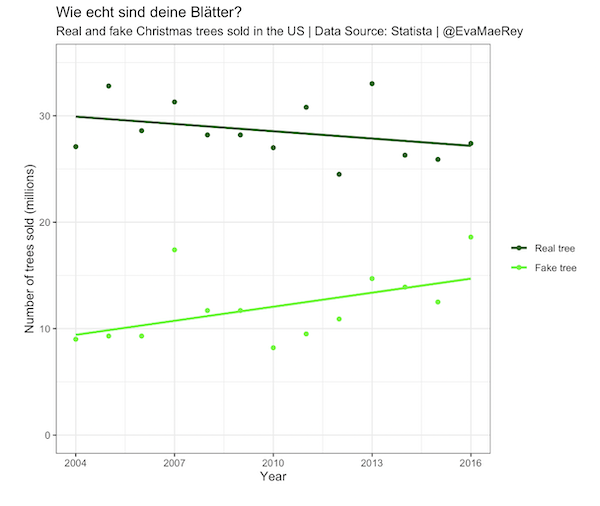

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#11)

This data is in **long** or **tidy** format.

In [17]:
df = pd.read_excel("Christmas tree sales.xlsx")
df.head()

,Year,Number of trees sold,Type of tree
0,2004,27100000.0,Real tree
1,2005,32800000.0,Real tree
2,2006,28600000.0,Real tree
3,2007,31300000.0,Real tree
4,2008,28200000.0,Real tree


In [18]:
df['Number of trees sold (millions)'] = df['Number of trees sold'] / 1000000
df = df.drop(columns=['Number of trees sold'])
df.head()

,Year,Type of tree,Number of trees sold (millions)
0,2004,Real tree,27.1
1,2005,Real tree,32.8
2,2006,Real tree,28.6
3,2007,Real tree,31.3
4,2008,Real tree,28.2


In [19]:
df['Type of tree'].value_counts()

Real tree    13
Fake tree    13
Name: Type of tree, dtype: int64

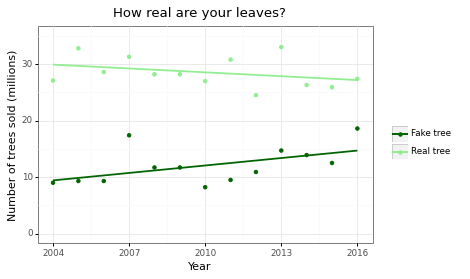

<ggplot: (380160340)>

In [21]:
(
    ggplot(df)
    + aes(x='Year')
    + aes(y='Number of trees sold (millions)')
    + geom_point()
    + aes(color='Type of tree')
    + geom_smooth(method="lm", se=False)
    + scale_color_manual(values=["darkgreen", "lightgreen"])
    + ylim([0, 35])
    + labs(color="")
    + labs(title = "How real are your leaves?")
    + theme_bw()
)

# MLB Ethnicities

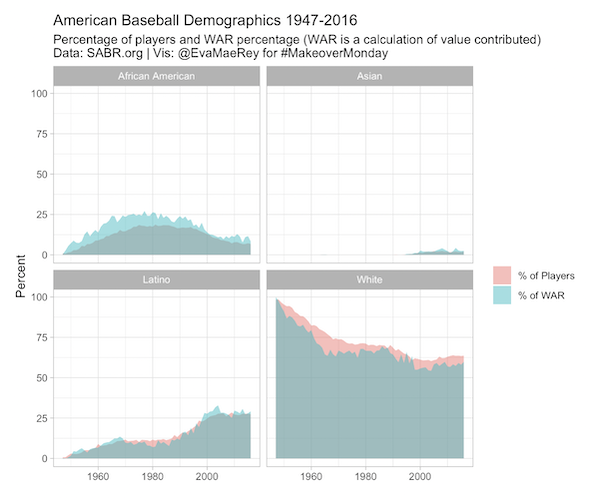

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#24)

This data is **not** in long/tidy format. There are **two measurements** in each row!

In [26]:
df = pd.read_excel("MLB Ethnicity 1947-2016.xlsx")
df.head()

,Year,% of Players,Ethnicity,% of WAR
0,1947,0.983,White,0.999
1,1948,0.985,White,0.976
2,1949,0.966,White,0.939
3,1950,0.953,White,0.910
4,1951,0.943,White,0.867


So we convert it! This process is called **reshaping** and usually involves [`pd.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) or [`df.pivot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html). Those documents aren't easy to read or understand, though, so I prefer looking at the [pandas guide to reshaping].

In [27]:
df = df.melt(id_vars=['Year', 'Ethnicity'], var_name='type', value_name='Percent')
df.Percent = df.Percent * 100
df.head()

,Year,Ethnicity,type,Percent
0,1947,White,% of Players,98.3
1,1948,White,% of Players,98.5
2,1949,White,% of Players,96.6
3,1950,White,% of Players,95.3
4,1951,White,% of Players,94.3


/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


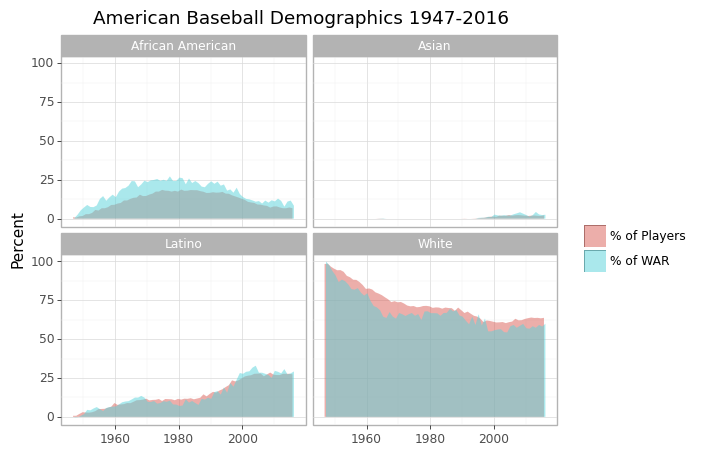

<ggplot: (681240351)>

In [55]:
(
    ggplot(df)
        + aes(x='Year', y='Percent')
        + facet_wrap('~Ethnicity')
        + aes(fill='type')
        + geom_area(alpha = 0.5, position=position_dodge(width=0.9))
        + labs(fill="")
        + labs(x="")
        + labs(title="American Baseball Demographics 1947-2016")
        + theme_light()
)

# Olympic Winter Games Medals

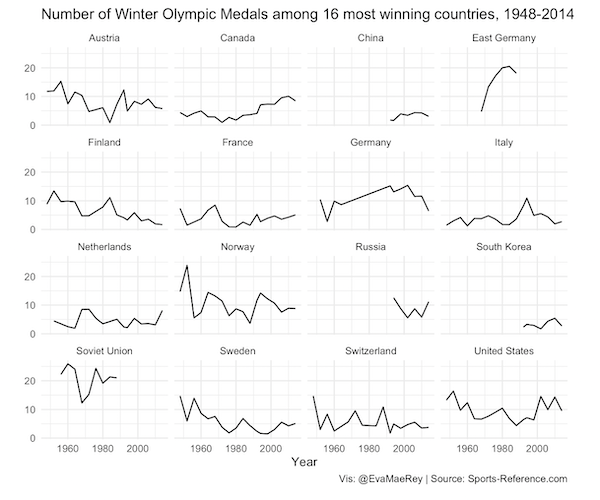

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#85)

Our final visualization is by **country** and **year**, so we need to reshape.

In [126]:
df = pd.read_csv("athlete_events.csv")

# Only winter!
df = df[(df.Season == 'Winter') & df.Medal.notnull()]

# Only post-1940!
df = df[df.Year > 1940]

# Okay good to go
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


In [127]:
# df = df.groupby('Year').Team.value_counts(normalize=True).reset_index(name='percent_medals').sort_values(by='Team')
# df.percent_medals = df.percent_medals * 100
df = pd.crosstab(df.Year, df.Team, normalize='index').reset_index().melt(id_vars='Year', value_name='percent_medals')
df.head()

,Year,Team,percent_medals
0,1948,Australia,0.0
1,1952,Australia,0.0
2,1956,Australia,0.0
3,1960,Australia,0.0
4,1964,Australia,0.0


In [128]:
# Only a few countries!
countries = ['Austria', 'Canada', 'Germany', 'China', 
             'Finland', 'France', 'Italy', 'Netherlands', 
             'Norway', 'Russia', 'United States', 'Sweden']
df = df[df.Team.isin(countries)]
df.head()

,Year,Team,percent_medals
18,1948,Austria,0.059259
19,1952,Austria,0.058824
20,1956,Austria,0.066667
21,1960,Austria,0.040816
22,1964,Austria,0.048387


/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


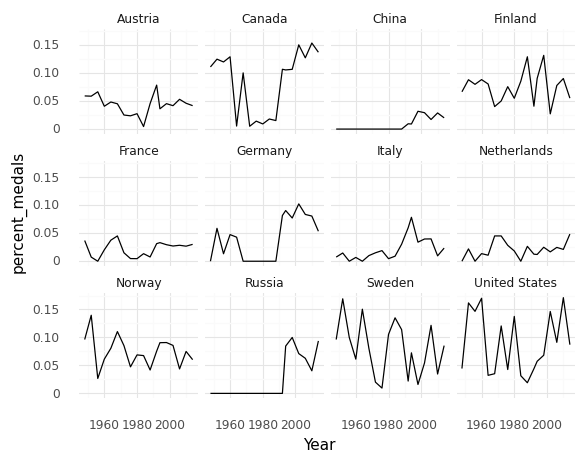

<ggplot: (680712997)>

In [131]:
(
    ggplot(df)
        + aes(x='Year', y='percent_medals')
        + geom_line()
        + facet_wrap('~Team')
        + theme_minimal()
)

# Olympic Winter Games (athletes edition)

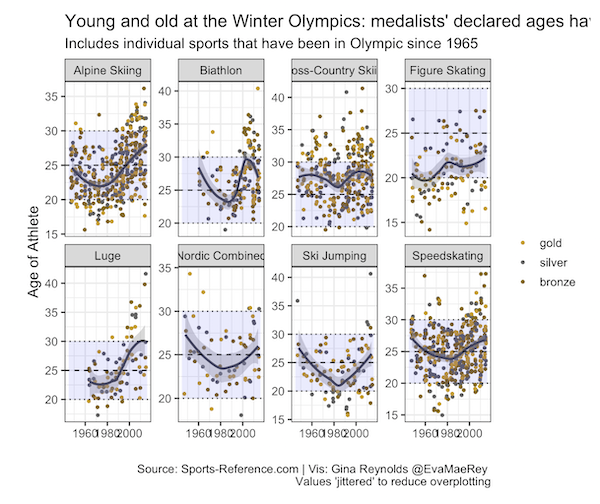

[Start here](https://evamaerey.github.io/ggplot_flipbook/ggplot_flipbook_xaringan.html#95)

This one is just **athletes**, so we don't need to change anything.

In [139]:
df = pd.read_csv("athlete_events.csv")

# Only winter!
df = df[(df.Season == 'Winter') & df.Medal.notnull()]

# Only post-1940!
df = df[df.Year > 1940]

# Okay good to go
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold
61,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze


/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/facets/facet.py:487: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
/Users/soma/.pyenv/versions/3.10.3/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


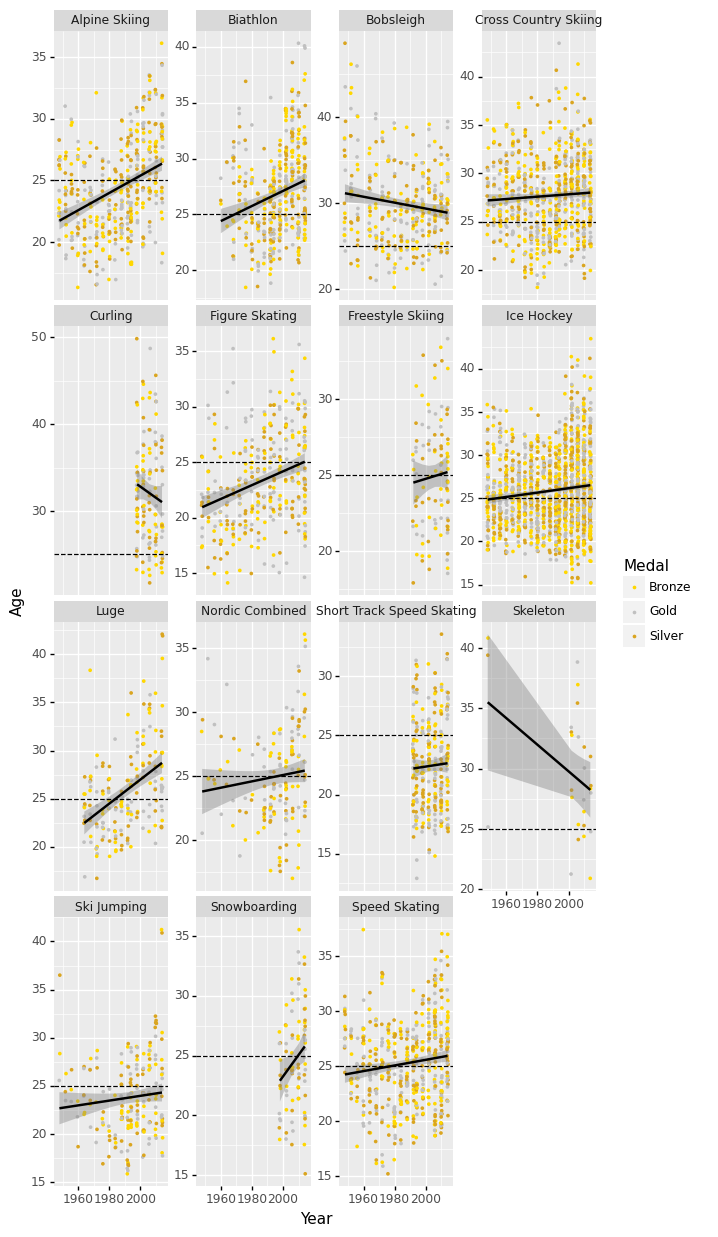

<ggplot: (699198251)>

In [187]:
(
    ggplot(df)
    + aes(x='Year', y='Age', fill='Medal')
    + facet_wrap('~Sport', scales = "free_y", nrow = 4)
    + theme(figure_size=(7,15))
    + geom_jitter(color='none', height=0.5, size=1)
    + geom_smooth(method='glm', fill='grey')
    + geom_hline(yintercept = 25, linetype='dashed')
    + theme(subplots_adjust={'wspace': 0.25})
    + scale_fill_manual(values = ["gold", "silver", "goldenrod"])
)